In [1]:
from __future__ import print_function, unicode_literals, absolute_import, division
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from tqdm.auto import tqdm

from glob import glob
from tifffile import imread
from csbdeep.utils import Path, normalize

from stardist import random_label_cmap, _draw_polygons
from stardist.models import StarDist2D

from skimage import measure
from skimage import draw
from skimage.filters import gaussian

import os
from pathlib import Path

np.random.seed(6)
lbl_cmap = random_label_cmap()

Using TensorFlow backend.
/Volumes/Coatamer/Users/weinberz/miniconda3/envs/stardist/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Volumes/Coatamer/Users/weinberz/miniconda3/envs/stardist/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Volumes/Coatamer/Users/weinberz/miniconda3/envs/stardist/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  

In [2]:
X = sorted(glob('test/*.tif'))
X = list(map(imread,X))

In [3]:
model = StarDist2D(None, name='gcamp-stardist', basedir='models')
modelv2 = StarDist2D(None, name='gcamp-stardist-v2', basedir='models')
modelv2_gauss = StarDist2D(None, name='gcamp-stardist-v2-gauss', basedir='models')

Instructions for updating:
Colocations handled automatically by placer.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.548407, nms_thresh=0.3.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.59885, nms_thresh=0.3.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.569643, nms_thresh=0.3.


In [4]:
def preprocess(X):
    X = [normalize(x,1,99.8,axis=(0,1)) for x in tqdm(X)] #(0,1) normalizes axes independently
    return X

def preprocess_gauss(X):
    X = [gaussian(x, multichannel=False, preserve_range=True) for x in X]
    X = preprocess(X)
    return X

preprocessed_X = preprocess(X)
preprocessed_X_gauss = preprocess_gauss(X)

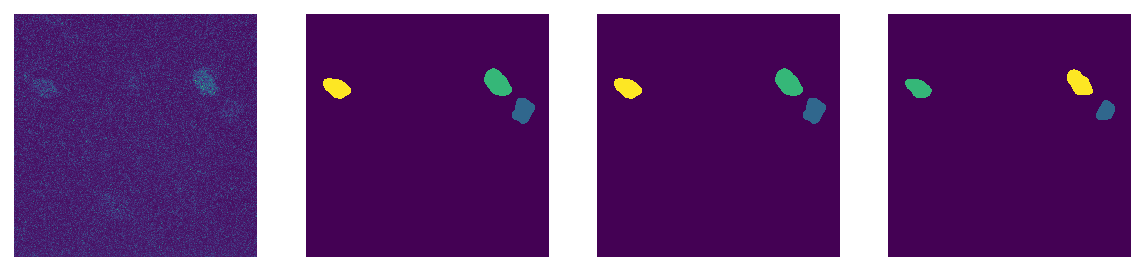

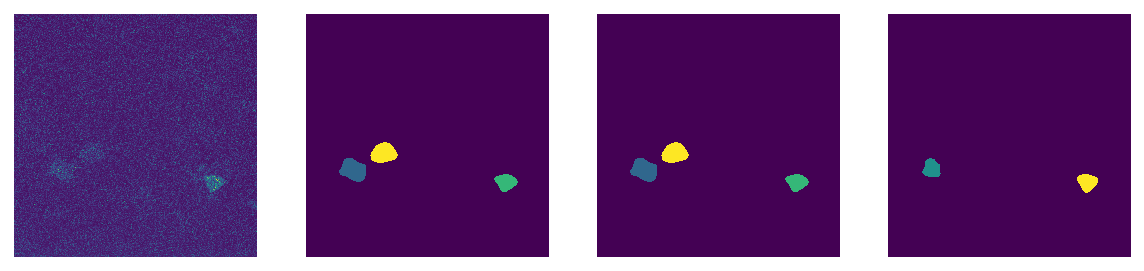

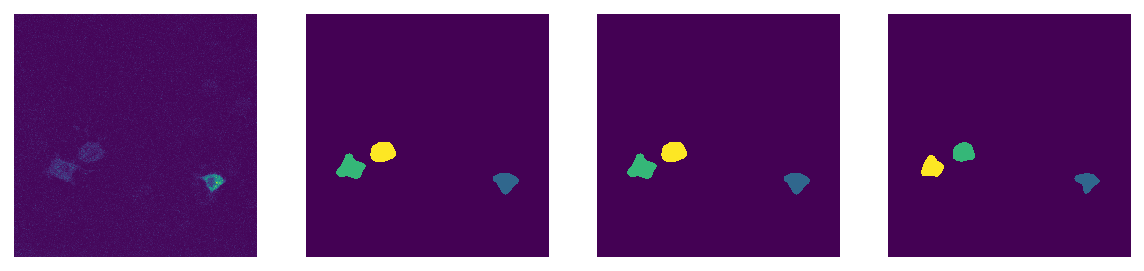

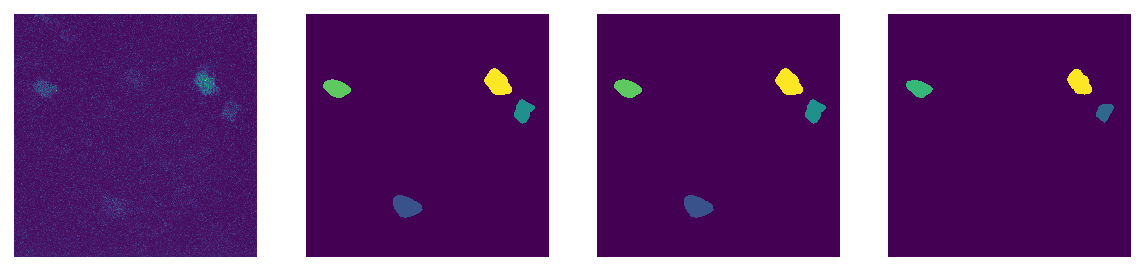

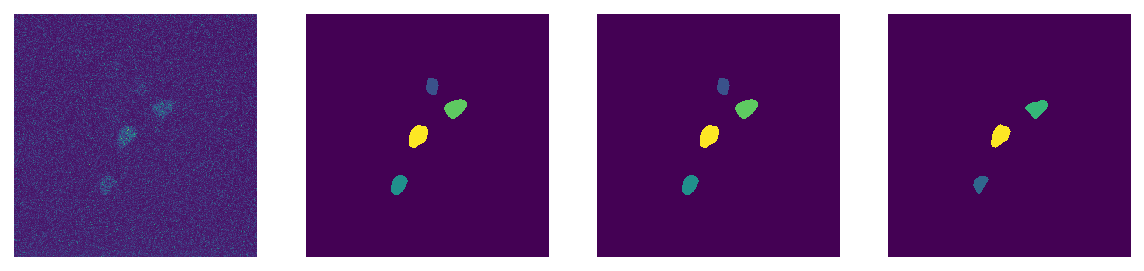

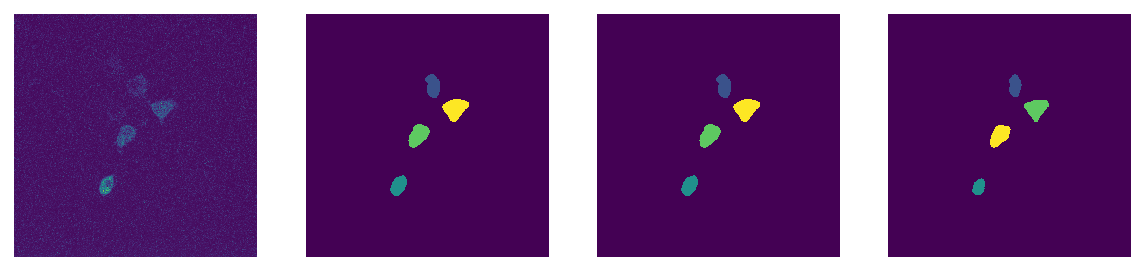

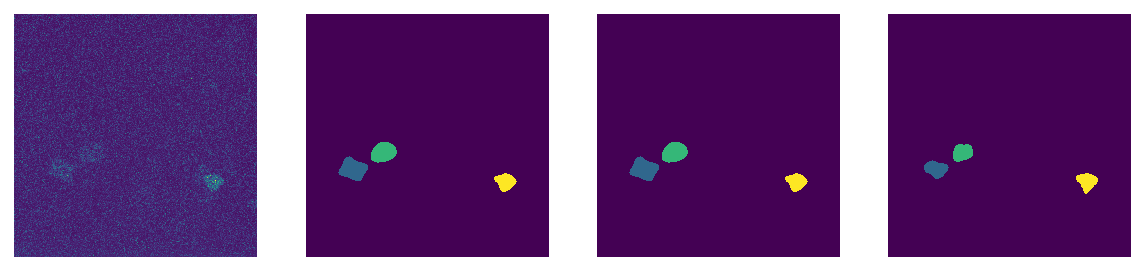

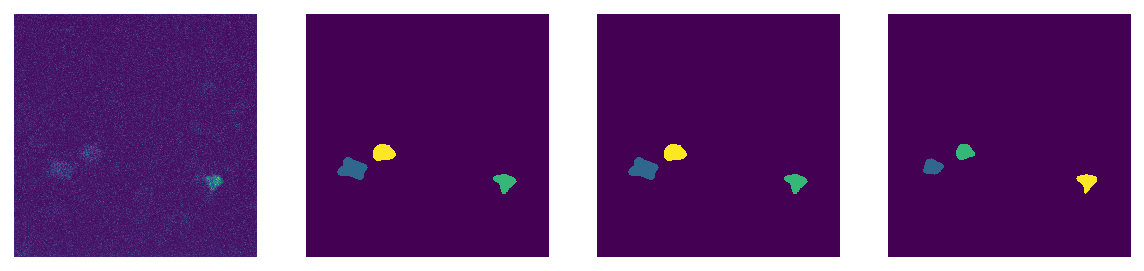

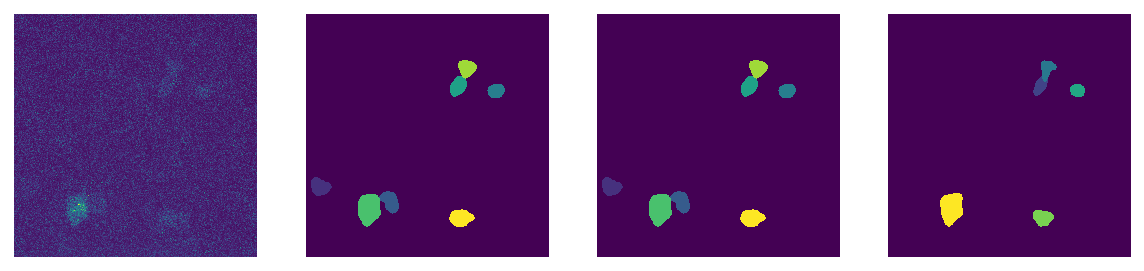

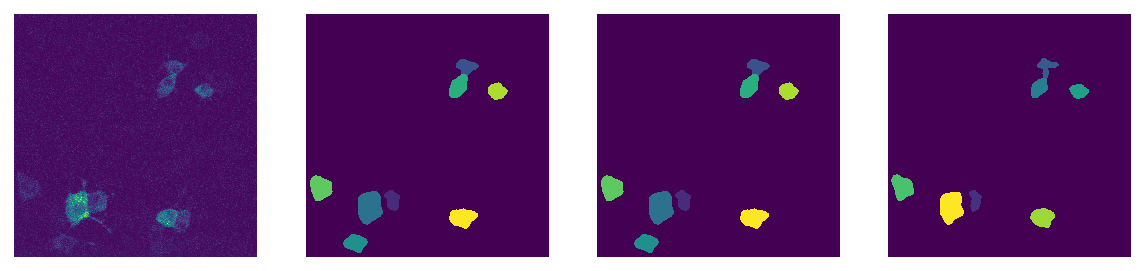

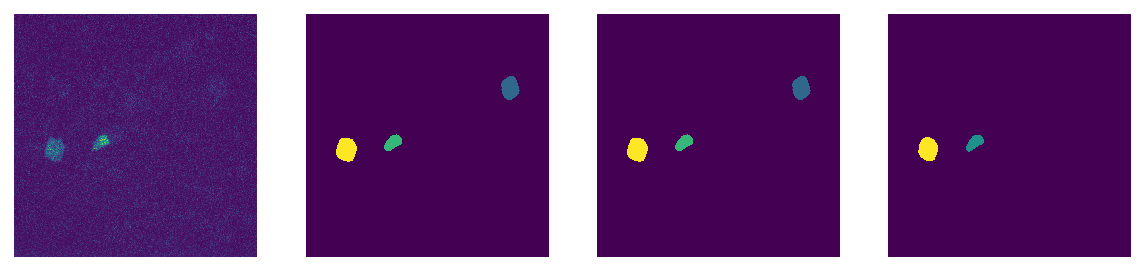

In [11]:
for idx, x in enumerate(X):
    frames = [x]
    for model in [model, modelv2]:
        output, details = model.predict_instances(preprocessed_X[idx], prob_thresh=0.4)
        frames.append(output)
    output, details = modelv2_gauss.predict_instances(preprocessed_X_gauss[idx], prob_thresh=0.4)
    frames.append(output)
    fig, axs = plt.subplots(1,4, figsize=(10,2.5))
    for plot, frame in enumerate(frames):
        axs.ravel()[plot].imshow(frame, vmin=np.min(frame.ravel()), vmax=np.max(frame.ravel()))
        axs.ravel()[plot].axis('off')